<a href="https://colab.research.google.com/github/NVinhTran0340/Programming-Project-Submission/blob/main/Test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/GoldDdataGroup

/content/drive/MyDrive/Colab Notebooks/GoldDdataGroup


In [3]:
!ls

BostonHousPriceProject_Final-1.ipynb  Final_SVR_Model.pkl  Test1
DataForPickleG.pkl		      FINAL_USOGOLD.csv


In [4]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

This Project is based on the famous Boston housing data available from Kaggle repository (https://www.kaggle.com/datasets/vikrishnan/boston-house-prices ).
It contains the details of data ranging from the the begining and last of 2012.
My project task is to create a machine learning model which can predict the gold prices in the last of 2012 with the opening gold sell in the stock market with the volume affecting it.
For solving this problem, I will approach the task, with a step by step approach to create a data analysis and prediction model based on  available from different Python packages, modules and classes.

##Step 1: Reading the data Reading the data with python

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read data and show a basic chart
goldData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GoldDdataGroup/FINAL_USOGOLD.csv")
print(goldData)
# print('Shape before deleting duplicate values:', goldData.shape)

# # Removing duplicate rows if any
# goldData=goldData.drop_duplicates()
# print('Shape After deleting duplicate values:', goldData.shape)

           Date        Open        High         Low       Close   Adj Close  \
0      1/3/2012  154.759995  156.300003  154.550003  155.919998  155.919998   
1      1/4/2012  155.429993  157.380005  155.339996  156.710007  156.710007   
2      1/5/2012  155.369995  158.029999  155.250000  157.779999  157.779999   
3      1/6/2012  158.589996  158.630005  156.380005  157.199997  157.199997   
4      1/9/2012  157.360001  157.589996  156.190002  156.500000  156.500000   
..          ...         ...         ...         ...         ...         ...   
240  12/24/2012  160.880005  160.960007  160.470001  160.619995  160.619995   
241  12/26/2012  161.360001  161.490005  160.639999  160.779999  160.779999   
242  12/27/2012  160.229996  161.309998  160.050003  161.160004  161.160004   
243  12/28/2012  160.940002  160.970001  160.149994  160.539993  160.539993   
244  12/31/2012  160.899994  162.750000  160.770004  162.020004  162.020004   

       Volume  
0    13385800  
1    11549700  
2  

Key observations from Step 1 about Data Description:

*  This file contains 256 rows of data throughout 2012
*  There are 7 attributes and they are outlined below:
  *   Date - The specific date when the gold price data was recorded;
  *   Open -  The price of gold at the beginning of the trading day;
  *   High - The highest price of gold reached during the trading day;
  *   Low - The lowest price of gold during the trading day;
  *   Close - The price of gold at the end of the trading day.
  *   Adj Close - The closing price of gold adjusted for factors(ex stock splits,.etc.), that might affect the true closing price
  *   Volume - The number of gold contracts traded or the total trading volume on that particular day







# Step 2 : Problem Statement Definition
* Creating  a prediction model to predict the price of opening, closing of gold sales along the 12 months of 2012. Then compare the accuracy of the prediction compared to actual data from that period. Finally see how the price of closing affected the volume of gold.
* Target Variable: Open
Predictors/Features: High, Low, Close, Volume.

## Step 3: Choosing the appropriate ML/AI Algorithm for Data Analysis.
* Based on the problem statement we need to create a supervised ML Regression model, as the target variable is **Continuous**.

# Step 4: Looking at the class distribution (Target variable distribution to check if the data is balanced or skewed)
* If target variable's distribution is too skewed then the predictive modeling will lead to poor results.
* Ideally Bell curve is desirable but slightly positive skew or negative skew is also fine.
* When performing Regression algorithm modelling and analysis, we need to make sure the histogram looks like a bell curve or slight skewed version of it.
* Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios from the data.

<Axes: >

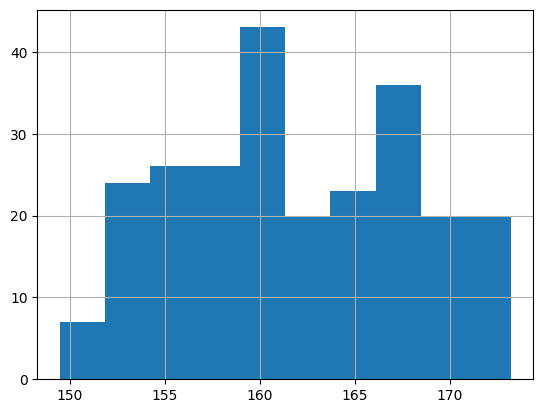

In [6]:
%matplotlib inline
# Creating histogram as the Target variable is Continuous
# This will help us to understand the distribution of the MEDV values
goldData['Open'].hist()

## Step 5: Basic Exploratory Data Analysis
* This step is performed to guage the overall data.
* The volume of data, the types of columns present in the data.
* Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

* This step helps to start the column/data rejection process.
* You must look at each column carefully and ask, does this column affect the values of the Target variable/Class?
* For example in this dataset, you will ask, does this column affect the price of the house?
* If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

* There are four commands which are used for Basic data exploratory Analysis in Python

* head() : This helps to see a few sample rows of the data
* info() : This provides the summarized information of the data
* describe() : This provides the descriptive statistical details of the data
* nunique(): This helps us to identify if a column is categorical or continuous

In [7]:
# Looking at HEADS in the data
goldData.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2012,154.759995,156.300003,154.550003,155.919998,155.919998,13385800
1,1/4/2012,155.429993,157.380005,155.339996,156.710007,156.710007,11549700
2,1/5/2012,155.369995,158.029999,155.250000,157.779999,157.779999,11621600
3,1/6/2012,158.589996,158.630005,156.380005,157.199997,157.199997,9790500
4,1/9/2012,157.360001,157.589996,156.190002,156.500000,156.500000,8771900


In [9]:
# Looking at TAILS in the data
goldData.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
240,12/24/2012,160.880005,160.960007,160.470001,160.619995,160.619995,3699400
241,12/26/2012,161.360001,161.490005,160.639999,160.779999,160.779999,4961800
242,12/27/2012,160.229996,161.309998,160.050003,161.160004,161.160004,8937700
243,12/28/2012,160.940002,160.970001,160.149994,160.539993,160.539993,6852900
244,12/31/2012,160.899994,162.750000,160.770004,162.020004,162.020004,11786200


In [10]:
# Looking at INFOs in the data
goldData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       245 non-null    object 
 1   Open       245 non-null    float64
 2   High       245 non-null    float64
 3   Low        245 non-null    float64
 4   Close      245 non-null    float64
 5   Adj Close  245 non-null    float64
 6   Volume     245 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.5+ KB


In [11]:
# Looking at DESCRIBE in the data
goldData.describe(include="all")

,Date,Open,High,Low,Close,Adj Close,Volume
count,245,245.000000,245.000000,245.000000,245.000000,245.000000,2.450000e+02
unique,245,NaN,NaN,NaN,NaN,NaN,NaN
top,1/3/2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,161.807347,162.579387,160.984081,161.867429,161.867429,1.029803e+07
std,NaN,6.082857,6.053469,6.126884,6.065573,6.065573,4.998783e+06
min,NaN,149.479996,150.699997,148.529999,149.460007,149.460007,3.177800e+06
25%,NaN,156.919998,157.589996,156.220001,157.119995,157.119995,7.212100e+06
50%,NaN,161.169998,162.089996,160.460007,161.380005,161.380005,9.287700e+06
75%,NaN,166.960007,167.679993,166.229996,167.100006,167.100006,1.203480e+07


In [12]:
# Looking at NUIQUE in the data
goldData.nunique()

,0
Date,245
Open,234
High,229
Low,235
Close,235
Adj Close,235
Volume,245


## Observations from Step 5 - Basic Exploratory Data Analysis
* Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column.
* Hence, creating a initial roadmap for further analysis.

* The selected columns in this step are not final, further study will be done and then a final list will be created

* Date - Continuous. Selected.
* Open - Continuous. Selected.
* High - Continuous. Selected.
* Low - Continuous. Selected.
* Close - Continuous. Selected.
* Adj Close - Continuous. Selected.
* Volume - Continuous. Selected.


## Step 7: Removing Unwanted columns
* There are no qualitative columns in the data.
* Hence no need to remove any column.

## Step 8: Visual Exploratory Data Analysis
### * We can spot a categorical variable in the data by looking at the unique values in them.(**NOT NEEDED**) as we don't have any categorical value(ex Female or male)



In [ ]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

# def PlotBarCharts(input_data, colsToPlot):
#     %matplotlib inline

#     import matplotlib.pyplot as plt

#     # Generating multiple subplots
#     fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
#     fig.suptitle('Bar charts of: '+ str(colsToPlot))

#     for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
#         input_data.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

## Step 9: Now Visualize distribution of all the Continuous Predictor variables in the data using histograms
* Based on the Basic Exploratory Data Analysis, there are eleven continuous predictor variables "Open", "High", "Low", "Close", "Adj Close", "Volume".

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

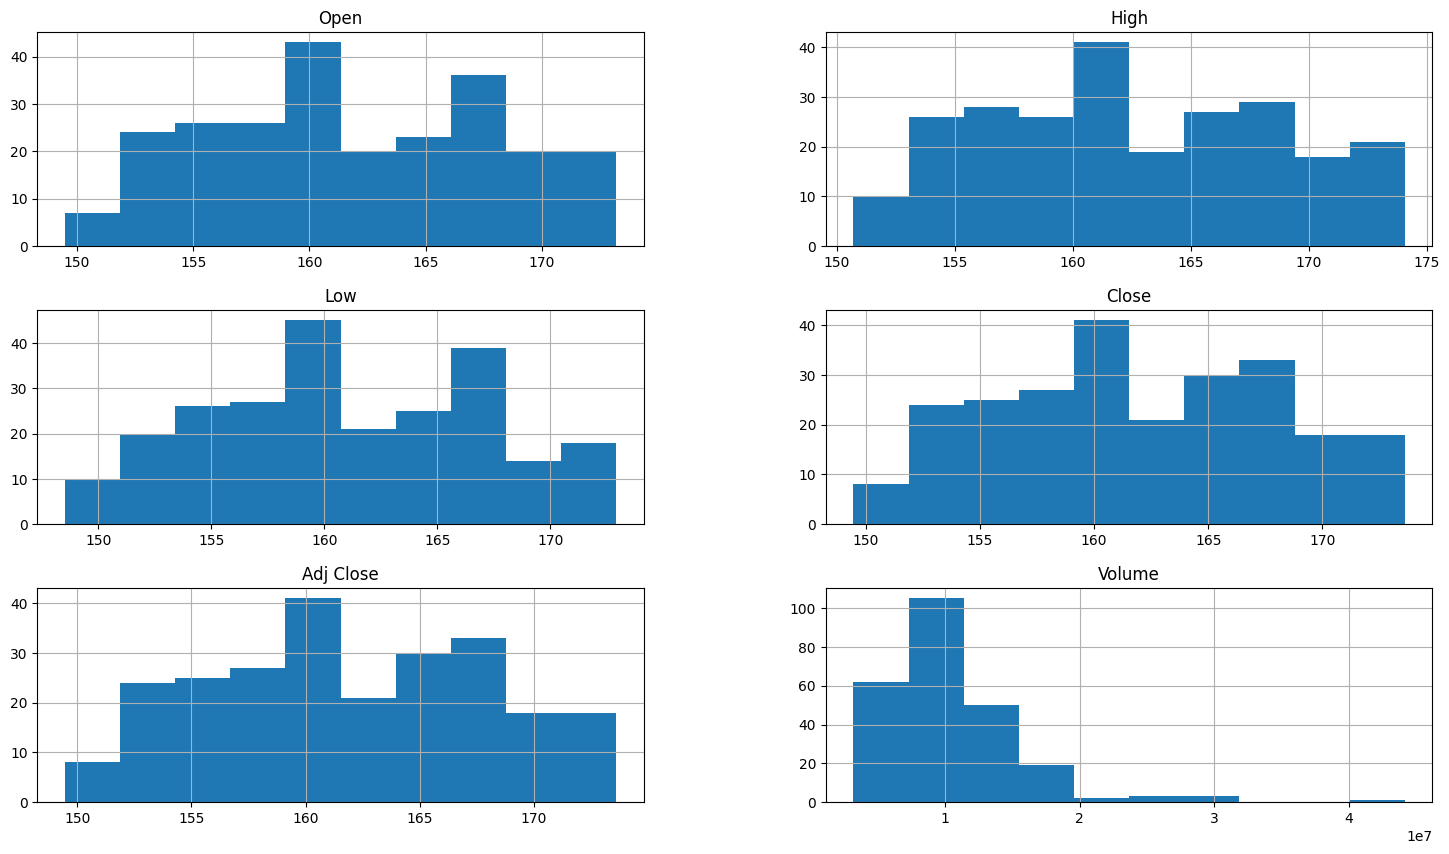

In [13]:
# Plotting histograms of multiple columns together
goldData.hist(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], figsize=(18,10))

## Observations from Step 9
* Histogram Interpretation
* Each histograms shows us the data distribution for a single continuous variable.

* The X-axis shows the range of values and Y-axis represent the number of values in that range.
* For example, in the histogram of open, there are over 40 days that gold price reach in closet to $160.00

* Selected Continuous Variables:
* Open : Selected. The distribution is good
* High : Selected. The distribution is good.
* Low : Selected. The distribution is good.
* Close : Selected. The distribution is good.
* Volume : Selected. The outliner for 40000000 and 30000000 are quite low. They needed to be treated as such.


## Step 10: Outlier Analysis
* Outliers are extreme values in the data which are far away from most of the values.
* You can see them as the tails in the histogram.

* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value
* Let us find out out the most logical value to be replaced in place of outliers by looking at the histogram.


In [14]:
#Replacing outliers for 'Volume'
# Finding nearest values to over 30000000 (at this histogram larger than 3) mark
goldData['Volume'][goldData['Volume']<30000000].sort_values(ascending=False)

,Volume
15,28957700
48,28822100
174,28336900
103,27399400
238,25148400
...,...
218,3810700
240,3699400
124,3654200
150,3620500


Observation: Above result shows the nearest logical value is 25000000, hence, replacing any value above 30000000 with it.

In [15]:
# Replacing outliers with nearest possibe value
goldData['Volume'][goldData['Volume']>30000000] = 25000000

tep 11:Visualising Data Distribution after outlier removal

array([[<Axes: title={'center': 'Volume'}>]], dtype=object)

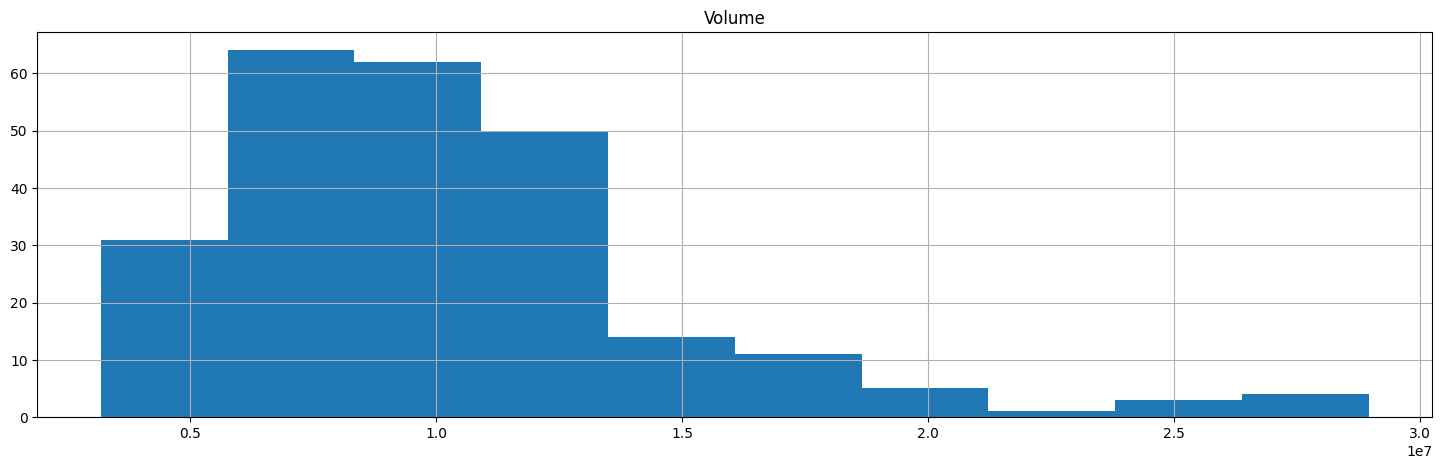

In [16]:
goldData.hist(['Volume'], figsize=(18,5))

## Step 12: Missing Values Analysis

* So for the missing value, volume data which is higher than 30000000 be replaced with 250000000


In [17]:
# Finding how many missing values are there for each column
goldData.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


##Observations from Step 12: Missing Value Analysis
* No missing values in data
* So no removal is required


## Step 13: Feature Selection (Attribute Selection)

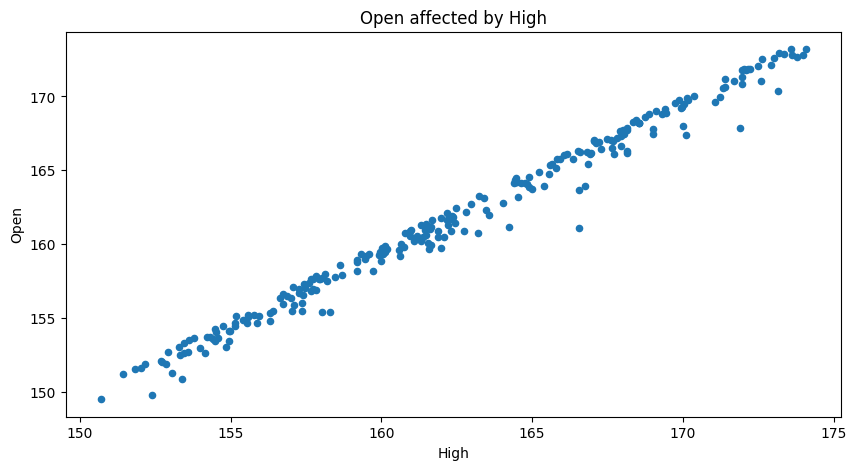

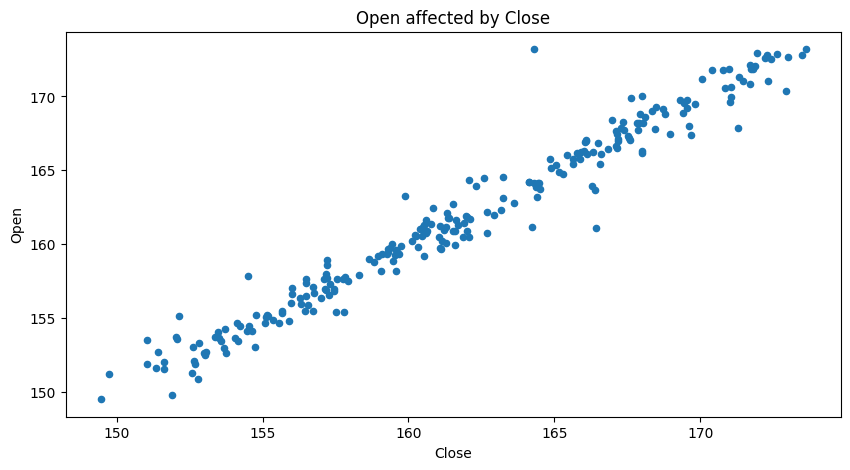

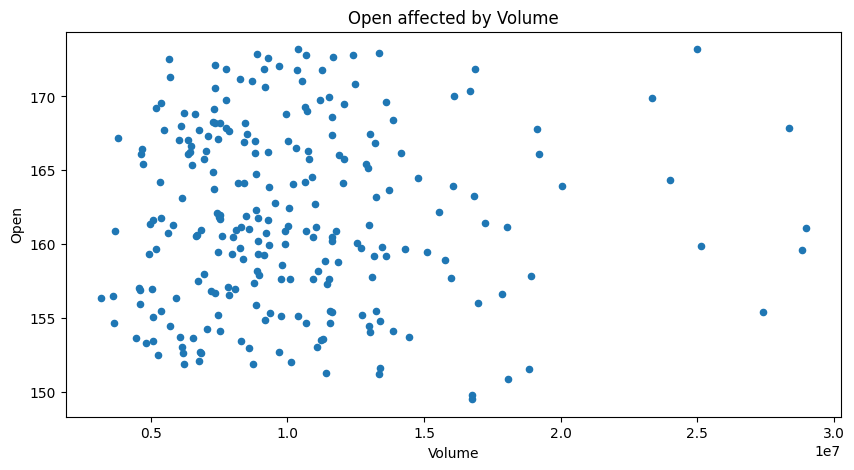

In [18]:
ContinuousCols=['High', 'Close', 'Volume']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    goldData.plot.scatter(x=predictor, y='Open', figsize=(10,5), title="Open" + " affected by "+predictor)

## Scatter charts interpretation
* So when we look at those three scatter plots:

* **!!Increasing Trend are aprearing in the first two**: This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML model building!

*   While the third one with Volume does appear quite randomly. That means it may not been able to provide good data to ML model building.





## Step 14: Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

* Pearson's correlation coefficient is a powerful metric for doing this.
* It can simply be calculated as the covariance between two features  x and  y
  (numerator) divided by the product of their standard deviations (denominator):

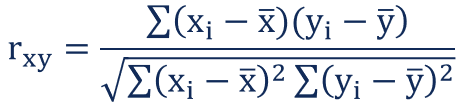

* This value can be calculated only between two numeric columns
Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
* Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
* Correlation near {0} means No relationship, the scatter plot will show no clear trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter
* We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question.

In [19]:
# Calculating correlation matrix
ContinuousCols=[ 'Open', 'High', 'Close', 'Volume']

# Creating the correlation matrix
CorrelationData=goldData[ContinuousCols].corr()
CorrelationData

,Open,High,Close,Volume
Open,1.000000,0.992589,0.980582,0.027497
High,0.992589,1.000000,0.991283,0.076440
Close,0.980582,0.991283,1.000000,0.031369
Volume,0.027497,0.076440,0.031369,1.000000


In [20]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['Open'][abs(CorrelationData['Open']) > 0.5 ]

,Open
Open,1.000000
High,0.992589
Close,0.980582


## Observations from Step 14
* Final selected Continuous columns:

* **'High', 'Close'**

# Step 15:  Relationship exploration: Categorical Vs Continuous -- Box Plots(NOT NEEDED)
* When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots,  and
* Measure the strength of relation using Anova test.

In [ ]:
# Box plots for continuous Target Variable "MEDV" and Categorical predictors
# CategoricalColsList=['RAD', 'CHAS']

# import matplotlib.pyplot as plt
# fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# # Creating box plots for each continuous predictor against the Target Variable "MEDV"
# for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
#     BostonData.boxplot(column='MEDV', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

##Observations from Step 15: Box-Plots interpretation(NOT NEEDED)

* What should you look for in these box plots?

* These plots gives an idea about the data distribution of continuous predictor in the Y-axis for each of the category in the X-Axis.

* If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.

* On the other hand if the distribution is different for each category(the boxes are not in same line!). It hints that these variables might be correlated with MEDV.

* For this datadata, both the categorical predictors looks correlated with the Target variable.

We confirm this by looking at the results of ANOVA test below

## Step 16: Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test(NOT NEEDED)

* Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

* Assumption(H0) Null Hypothesis: There is NO relation between the given variables (i.e.
* The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* ANOVA Test result: Probability of H0 (Null Hypothesis being true

In [ ]:
# # Defining a function to find the statistical relationship with all the categorical variables
# def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
#     from scipy.stats import f_oneway

#     # Creating an empty list of final selected predictors
#     SelectedPredictors=[]

#     print('##### ANOVA Results ##### \n')
#     for predictor in CategoricalPredictorList:
#         CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
#         AnovaResults = f_oneway(*CategoryGroupLists)

#         # If the ANOVA P-Value is <0.05, that means we reject H0
#         if (AnovaResults[1] < 0.05):
#             print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
#             SelectedPredictors.append(predictor)
#         else:
#             print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

#     return(SelectedPredictors)

In [ ]:
# #Calling the function to check which categorical variables are correlated with target
# CategoricalPredictorList=['RAD', 'CHAS']
# FunctionAnova(inpData=BostonData,
#               TargetVariable='MEDV',
#               CategoricalPredictorList=CategoricalPredictorList)

## Selecting final Predictors/Features for building Machine Learning/AI model.(**!NEEDED!**)
* Based on the extensive tests with exploratory data analysis, we can select the final features/predictors/columns for machine learning model building as:
* **'Open', 'High', 'CLose'**


In [21]:
SelectedColumns=['Open', 'High','Close']

# Selecting final columns
DataForPickleG=goldData[SelectedColumns]
DataForPickleG.head()

,Open,High,Close
0,154.759995,156.300003,155.919998
1,155.429993,157.380005,156.710007
2,155.369995,158.029999,157.779999
3,158.589996,158.630005,157.199997
4,157.360001,157.589996,156.500000


In [22]:
# Saving this final data subset for reference during deployment
DataForPickleG.to_pickle('DataForPickleG.pkl')

## Step 17: Data Pre-processing for Machine Learning Model Building or Model Development
* List of steps that needs to be performed on predictor variables before data can be used for machine learning

* Converting each Ordinal Categorical columns to numeric
* Converting Binary nominal Categorical columns to numeric using 1/0 mapping
* Converting all other nominal categorical columns to numeric using pd.get_dummies()
* Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks
* Converting the ordinal variable to numeric - In this data there is no Ordinal categorical variable.
* Converting the binary nominal variable to numeric using 1/0 mapping: There is no binary nominal variable in string format in this data


## Converting the nominal variable to numeric using get_dummies()

In [23]:
# Treating all the nominal variables at once using dummy variables
DataForPickleG_Numeric=pd.get_dummies(DataForPickleG)

# Adding Target Variable to the data
DataForPickleG_Numeric['Open']=goldData['Open']

# Printing sample rows
DataForPickleG_Numeric.head()

,Open,High,Close
0,154.759995,156.300003,155.919998
1,155.429993,157.380005,156.710007
2,155.369995,158.029999,157.779999
3,158.589996,158.630005,157.199997
4,157.360001,157.589996,156.500000


## Step 18: Machine Learning Model Development:
* Splitting the data into Training and Testing sample
* We dont use the full data for creating the model (training data).
* Some data is randomly selected and kept aside for checking how good the model is.
* This is known as Testing Data and the remaining data is called Training data on which the model is built.
* Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [24]:
# Printing all the column names for our reference
DataForPickleG_Numeric.columns

Index(['Open', 'High', 'Close'], dtype='object')

In [25]:
#Separate Target Variable and Predictor Variables
TargetVariable='Open'
Predictors=['High', 'Close']

X=DataForPickleG_Numeric[Predictors].values
y=DataForPickleG_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [26]:
# Sanity check for the sampled data
# For checking the X and y shape of train and actual test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(171, 2)
(171,)
(74, 2)
(74,)


## Step 20: Multiple Linear Regression Algorithm For ML/AI model building



Default step

In [27]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Open']-TestingDataResults['PredictedOpen']))/TestingDataResults['Open'])

MAPE=np.mean(TestingDataResults['APE'])
OpenMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
OpenAccuracy=100- OpenMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Open Accuracy on test data:', OpenAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.9857946079032626

##### Model Validation and Accuracy Calculations ##########
         High       Close        Open  PredictedOpen
0  161.179993  160.460007  160.509995          160.0
1  167.500000  167.179993  167.139999          167.0
2  157.720001  156.490005  157.600006          157.0
3  168.869995  167.919998  168.839996          168.0
4  165.580002  165.070007  165.330002          165.0
Mean Accuracy on test data: 99.65149297800079
Open Accuracy on test data: 99.69350539875275

Accuracy values for 10-fold Cross Validation:
 [99.55573915 99.55130921 99.72989608 99.72312957 99.65598761 99.80628216
 99.71015946 99.68666562 99.6227333  99.71300245]

Final Average Accuracy of the model: 99.68


# Decision Tree Regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.9937580392318746

##### Model Validation and Accuracy Calculations ##########
         High       Close        Open  PredictedOpen
0  161.179993  160.460007  160.509995          161.0
1  167.500000  167.179993  167.139999          167.0
2  157.720001  156.490005  157.600006          157.0
3  168.869995  167.919998  168.839996          168.0
4  165.580002  165.070007  165.330002          164.0
Mean Accuracy on test data: 99.55098404349587
Median Accuracy on test data: 99.64824359321155

Accuracy values for 10-fold Cross Validation:
 [99.51987751 99.56892488 99.61796249 99.63550933 99.57256116 99.69384138
 99.69264649 99.50838404 99.57245353 99.75903398]

Final Average Accuracy of the model: 99.61


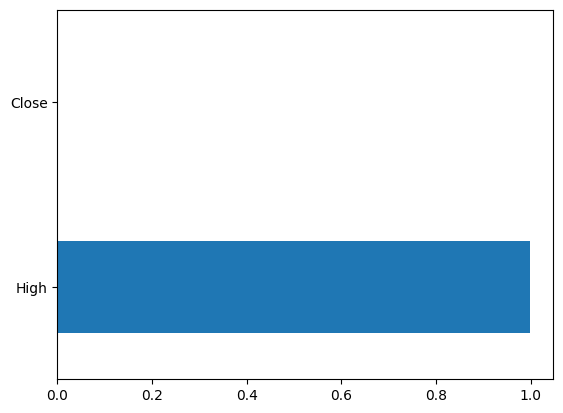

In [28]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Open']-TestingDataResults['PredictedOpen']))/TestingDataResults['Open'])

MAPE=np.mean(TestingDataResults['APE'])
OpenMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
OpenAccuracy=100- OpenMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', OpenAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

The tree decision is 99.61 % correct, but is 0.06& lesser than the linear method
--> Not chosen

##Plotting/Visualising the Decision Tree



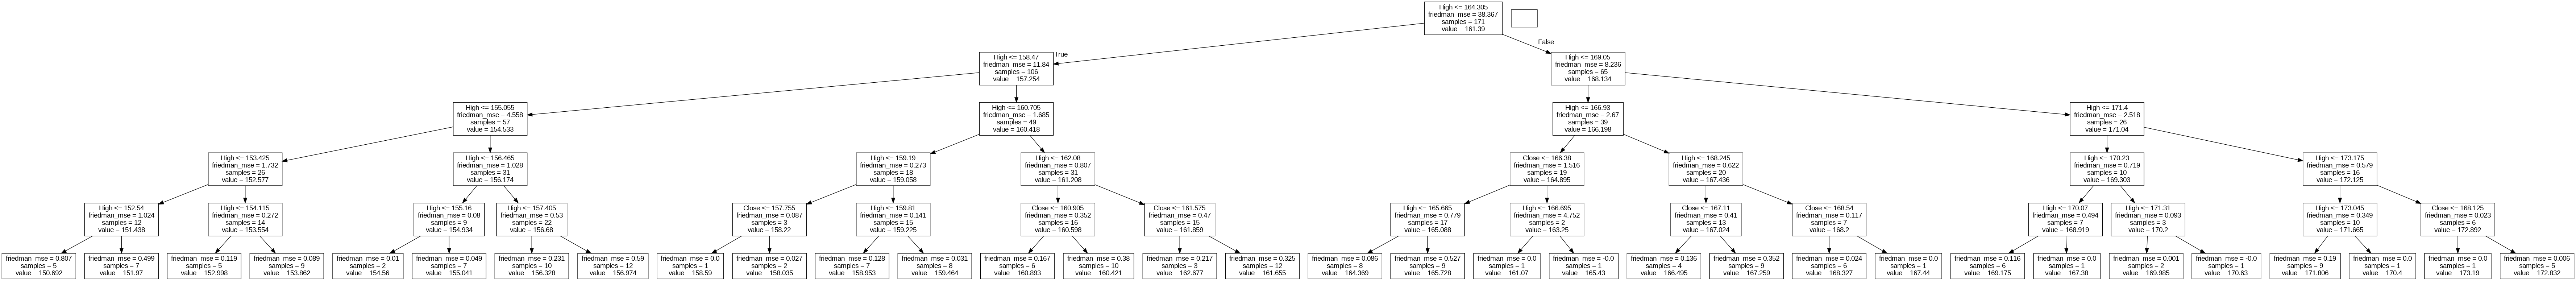

In [53]:
# Load libraries
from IPython.display import Image
from sklearn import tree
import pydotplus

# Assuming DT is your fitted DecisionTreeRegressor model
dot_data = tree.export_graphviz(DT, out_file=None, feature_names=Predictors)

# printing the rules
#print(dot_data)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png(), width=1500,height=1500)
# Double click on the graph to zoom in

# Random Forest Regressor

RandomForestRegressor(criterion='friedman_mse', max_depth=4, n_estimators=400)
R2 Value: 0.9900173726655946

##### Model Validation and Accuracy Calculations ##########
         High       Close        Open  PredictedOpen
0  161.179993  160.460007  160.509995          160.0
1  167.500000  167.179993  167.139999          167.0
2  157.720001  156.490005  157.600006          157.0
3  168.869995  167.919998  168.839996          168.0
4  165.580002  165.070007  165.330002          165.0
Mean Accuracy on test data: 99.58822544298671
Median Accuracy on test data: 99.64934716431867

Accuracy values for 10-fold Cross Validation:
 [99.53020888 99.67145524 99.62748462 99.6588142  99.50804734 99.72596785
 99.68054792 99.49346611 99.56408126 99.73099445]

Final Average Accuracy of the model: 99.62


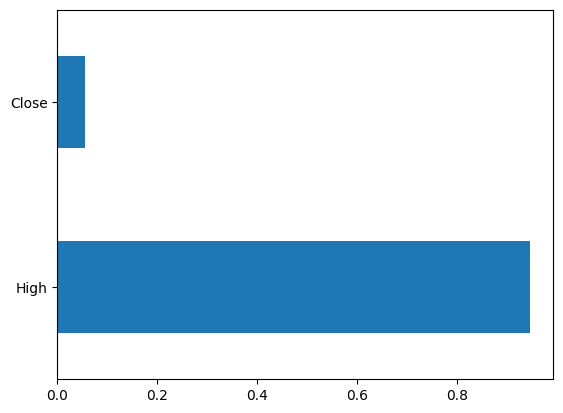

In [29]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=4, n_estimators=400,criterion='friedman_mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Open']-TestingDataResults['PredictedOpen']))/TestingDataResults['Open'])

MAPE=np.mean(TestingDataResults['APE'])
OpenMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
OpenAccuracy=100- OpenMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', OpenAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


## Step 21: AdaBoost Algorithm For ML/AI model building

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.9861019269313257

##### Model Validation and Accuracy Calculations ##########
         High       Close        Open  PredictedOpen
0  161.179993  160.460007  160.509995          160.0
1  167.500000  167.179993  167.139999          167.0
2  157.720001  156.490005  157.600006          157.0
3  168.869995  167.919998  168.839996          168.0
4  165.580002  165.070007  165.330002          164.0
Open Accuracy on test data: 99.58841874853478
Open Accuracy on test data: 99.67093287543206

Accuracy values for 10-fold Cross Validation:
 [99.50788544 99.53934007 99.64168685 99.51968603 99.45336376 99.53294358
 99.57864878 99.36317226 99.44558941 99.72636703]

Final Average Accuracy of the model: 99.53


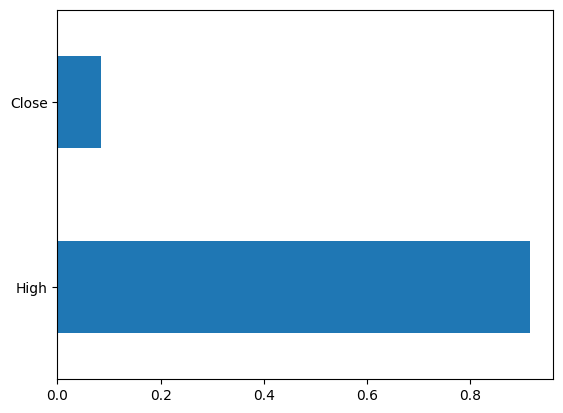

In [30]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Open']-TestingDataResults['PredictedOpen']))/TestingDataResults['Open'])

MAPE=np.mean(TestingDataResults['APE'])
OpenMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
OpenAccuracy=100- OpenMAPE
print('Open Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Open Accuracy on test data:', OpenAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# XGBoost Regressor

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.9995955104754651

##### Model Validation and Accuracy Calculations ##########
         High       Close        Open  PredictedOpen
0  161.179993  160.460007  160.509995          160.0
1  167.500000  167.179993  167.139999          167.0

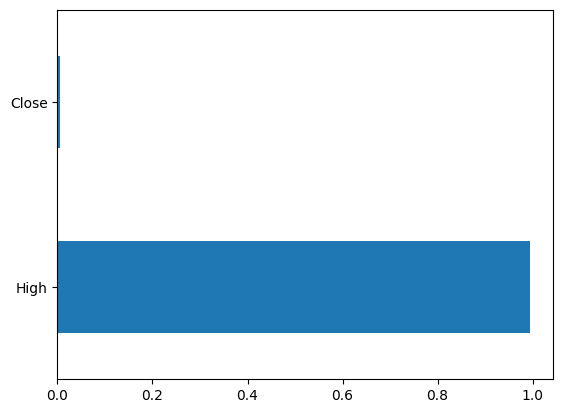

In [31]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Open']-TestingDataResults['PredictedOpen']))/TestingDataResults['Open'])


MAPE=np.mean(TestingDataResults['APE'])
OpenMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
OpenAccuracy=100- OpenMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Open Accuracy on test data:', OpenAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

#Plotting a single Decision tree out of XGBoost

<Axes: >

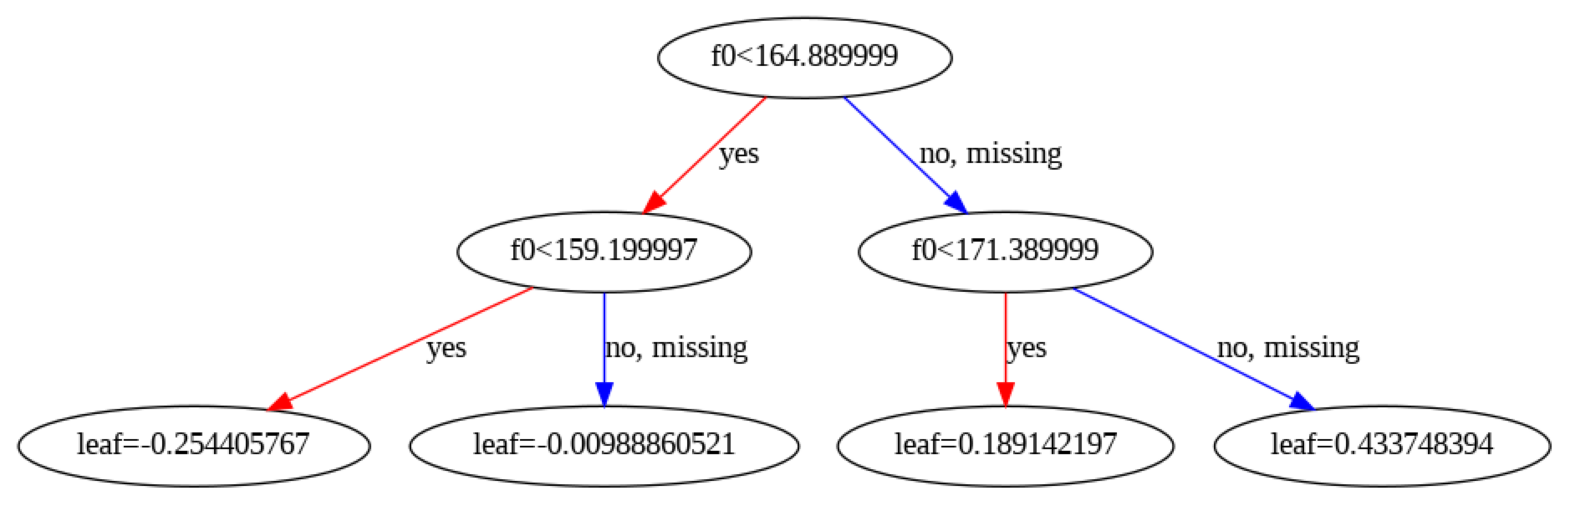

In [ ]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

2 more actual models in step 21

> step 23 may needed for pickle


*  step 24 and 25 in colab for now
*  try to input or user-input data to make a small prediction


> API's steps is optional



*   final final step, do it inside pycharm








# Support Vector Machine (SVM) Regressor

In [32]:
# Support Vector Machines(SVM)
from sklearn import svm
RegModel = svm.SVR(C=50, kernel='rbf', gamma=0.01)

# Printing all the parameters
print(RegModel)

# Creating the model on Training Data
SVM=RegModel.fit(X_train,y_train)
prediction=SVM.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, SVM.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel
%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Open']-TestingDataResults['PredictedOpen']))/TestingDataResults['Open'])

MAPE=np.mean(TestingDataResults['APE'])
OpenMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
OpenAccuracy=100- OpenMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', OpenAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

SVR(C=50, gamma=0.01)
R2 Value: 0.9855544013441369

##### Model Validation and Accuracy Calculations ##########
         High       Close        Open  PredictedOpen
0  161.179993  160.460007  160.509995          160.0
1  167.500000  167.179993  167.139999          167.0
2  157.720001  156.490005  157.600006          157.0
3  168.869995  167.919998  168.839996          169.0
4  165.580002  165.070007  165.330002          165.0
Mean Accuracy on test data: 99.64595702637578
Median Accuracy on test data: 99.70833591977679

Accuracy values for 10-fold Cross Validation:
 [99.54893212 99.5582678  99.7204363  99.70851167 99.63835054 99.79520001
 99.74516787 99.68327893 99.714096   99.73972518]

Final Average Accuracy of the model: 99.69


#So the result shows **Support Vector Machine - SVM** is the best option so far (As it is have a tiny bit more percentages of right than AdaBoost model and XGB)

# Step 21: Model Deployment
* Deployment of the Model - Based on the above trials we select that algorithm which produces the best average accuracy.

* In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

* I am choosing **SVM** as the final model it has the highest accuracy!

* In order to deploy the model we follow steps outlined next.

* Train/Build the model again using 100% data available

* Save the model as a serialized file which can be stored anywhere.

* Create a python function which gets integrated with front-end Viewer(GUI/ Website etc.) to take all the inputs and returns the prediction

* Choosing only the most important variables

* Its beneficial to keep lesser number of predictors for the model while deploying it in production.

* The lesser predictors you keep, the better it is, because the model will be less dependent on predictor columns/features, hence, more stable.

* This is important specially when the data is high dimensional(too many predictor columns/features).

* For this dataset, the most important predictor variables are 'High' and 'Close'. As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables will result in better house price prediction platform/system.

In [33]:
# Separate Target Variable and Predictor Variables
TargetVariable='Open'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['High', 'Close']

X=DataForPickleG_Numeric[Predictors].values
y=DataForPickleG_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(245, 2)
(245,)


# Cross validating the final model accuracy with less predictors

In [34]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR # Import the SVR class for Support Vector Regression

# choose from different tunable hyper parameters
from sklearn.linear_model import LinearRegression
RegModel=SVR()
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [99.49792334 99.39138673 99.64513699 99.35597637 99.54928208 99.71139026
 99.72461825 99.02777651 99.65127109 99.74054337]

Final Average Accuracy of the model: 99.53


# Step 22: Retraining the final model using 100% data

In [35]:
# Training the model on 100% Data available
Final_SVR_Model=RegModel.fit(X,y)

# Step 23: Save the model as a serialized file which can be stored anywhere

In [36]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_SVR_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_SVR_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content/drive/MyDrive/Colab Notebooks/GoldDdataGroup


:# Step 24: Create a python function pycharm

In [37]:
from re import IGNORECASE
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForPickleG=pd.read_pickle('DataForPickleG.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForPickleG], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['High', 'Close']

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_SVR_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

# Step 25: Calling the function for some new data

In [38]:
# Calling the function for some new data
# from 10 of first to 11 of first
New_test_data=pd.DataFrame(data=[[159.470001,159.339996],[158.639999,158.910004]],columns=['High', 'Close'])

print(New_test_data)

# Calling the Function for prediction
FunctionPredictResult(InputData=New_test_data)

         High       Close
0  159.470001  159.339996
1  158.639999  158.910004


,Prediction
0,159.108465
1,158.392639
